<h1> Machine Learning Assignment 2 </h1>

<h3> Python version and libraries version used: </h3>
<ol>
    <li> Python == 3.7.11
    <li> numpy == 1.21.2
    <li> biopython == 1.79
    <li> matplotlib == 3.4.3
    <li> scikit-learn == 1.0
</ol> 
    
<h3> Steps to be followed: </h3>
<ol>
    <li> Read the fasta file to get the sequences from the file and put it into a dictionary
    <li> Calculate the distance matrix using the hamming distance
    <li> Apply MDS to the distance matrix to covert it to 2D and then plot the scaled matrix to visually identify number of clusters
    <li> Implementing K-means from scratch (going to use the same parameters as sklearn.cluster) implement it as class and call find_cluster on the 2D data so that we can cluster the data.
    <li> Visualize the clusters with the respective centroids </li>     
</ol> 

<h2> Step-1: Reading the fasta file and get the sequences and place them in a dictionary </h2>

<p> we use the <b> BioPython </b> library to parse the contents of the fasta file to a dictionary so that we can use the id provided in the fasta file for a sequence to identify it. </p>

In [1]:
from Bio import SeqIO
import numpy as np
import random
import sys
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [2]:
val = dict()
for seq_rec in SeqIO.parse("HW2.fas","fasta"):
    val[seq_rec.id] = str(seq_rec.seq)

In [3]:
values = list(val.values())

<h2> Step-2: Creating the distance matrix using Hamming distance based on the change in the DNA sequence</h2>
<p> we use dynamic programming technique to reduce the computations required to calculate hamming distance matrix. The Order is O(n<sup>2</sup>log(m)) which can be used to reduce the problem from a cubic order to quadratic. where <b><i>n</i></b> is the number of sequences and <b><i>m</i></b> is the length of each sequence.</p>

In [4]:
distance = []
for i in range(len(values)):
    temp = []
    for j in range(len(values)):
        dist = 0
        for k in range(len(values[i])):
            if values[i][k] != values[j][k]:
                dist+=1
        temp.append(dist)
       
    distance.append(temp)

<h4> Here we are checking whether the distance matrix obtained by us is of the correct shape by checking the length of the 2D matrix created by us </h4>

In [5]:
len(distance)

120

In [6]:
len(distance[0])

120

<h4> Here we are checking that if the trace (Major Diagonal) of the distance matrix is zero for sanity check </h4>

In [7]:
flag=0
for i in range(len(distance)):
    if distance[i][i] != 0:
        print("Something is wrong")
        flag = 1
if flag==0:
    print("Sanity Check passed!!")

Sanity Check passed!!


#### Create an object of MDS class (from sklearn.manifold) that will accept pre-computed distance matrix and also we set a random seed of 6998 to make sure that we have repeatability in our results.


In [8]:
mds = MDS(2,dissimilarity='precomputed', random_state=6998)

In [9]:
transform_2d = mds.fit_transform(distance)

<h3> Here we are going to plot the Scaled Matrix obtained from MDS </h3>

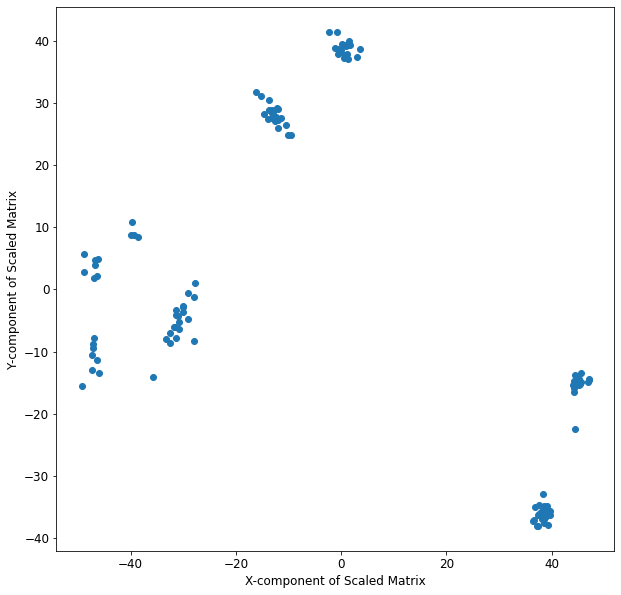

In [10]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=12)
x = []
y = []
for i in transform_2d:
    x.append(i[0])
    y.append(i[1])
plt.scatter(x,y)
plt.xlabel("X-component of Scaled Matrix")
plt.ylabel("Y-component of Scaled Matrix")
plt.show()

<h3> Here we can clearly see that we have 3 clusters so we choose our k-value for K-means clustering to be 3 </h3>

<h3> Steps in <em>KMeans</em> algorithm: </h3>
<ol>
    <li> Initialize the centroids as random points in the data set</li>
    <li> Then find the distance of each data point from the <em>k</em> clusters and then add to the cluster from which it has minimum distance from the centroid </li>
    <li> Then move the centroid of that cluster by taking mean of the data points present in that cluster. </li>
    <li> Keep running this exercise until maximum iterations specified or till the tolerance value condition has been met </li>
</ol>





<h3> Introduction to <em>KMeans++</em> initialization technique </h3>

<b> Problem with the standard KMeans :</b>
    <ul>
        <li>the standard KMeans algorithm is sensitive to initialization:
            <ul>
                <li> If the point is initialized as a <em>far-off</em> point then it might not have any values associated to its cluster</li>
                <li> If the points are intialized <em>nearby</em>, They might end up dividing the same cluster into fragments. </li>
            </ul>
        </li>
        </ul>
To overcome this drawback we use <em>kmeans++</em> intialization technique to intialize the points as KMeans is <em>sensitive</em> to intialization.
<br><br>
Steps of <b>kmeans++</b> algorithm:
<ol>
    <li> The first centroid is randomly choosen. </li>
    <li> The distance between the points and the nearest centroid is calculated. </li>
    <li> The point that has the maximum distance from one of the centroids is choosen as the next centroid. </li>
    <li> Steps 1-3 is repeated <em> k-1 </em> times. </li>
</ol>
<br><br>
Concept of <b><em>Tolerance</em></b>:
<br>
The concept of tolerance is that we continue the iterations of calculation of centroids till the distance between the old centroid and the new centroids are less than that of tolerance value that we have passed in the object.
<br><br>

Concept of <b><em>Intertia</em></b> and <em>multiple intializations</em>:
<br>

Often we come accross the situation that even with kmeans initalization we might not get the optimum clusters that we are looking for. So what we do in this case is that we run the kmeans with multiple initializations where we use different random seed values and we choose the values from the iterations that had the lowest inertia.
<br>
Formula for <em>inertia</em>:

$ Intertia = \sum \limits _{i=1} ^{k} {D_k}^2$

where $D_k$ is distances of the points of that cluster from its centroid.

We use this inertia to determine how good the cluster is the less the inertia the better as the distances inside the cluster(<em>intra- cluster</em>) must be less.
<h3> References: </h3>
<ol>
    <li> Sci-Kit Learn Official Repository Kmeans implentation(Used the template here for my class function): <a href=https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/cluster/_kmeans.py> Github Repo</a></li>
    <li> Geeks for Geeks (to learn the concept of kmeans++ intialization and boilerplate code for kmeans++ initialization): <a href=https://www.geeksforgeeks.org/ml-k-means-algorithm>External blog page </a> </li>
</ol>

In [11]:
import numpy as np
import sys
import random
# we implement KMeans based on the Sci-kit learn libraries and having the most feartures of maximum iterations, initialization using random and kmeans++
# n_init which will initialize the points based on different seed variables and then tolerance variable which will stop the iterations once the distance between the current and the previous centroids are less than the value passed to it
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, initial='kmeans++', n_init = 10, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters #k_value
        self.max_iter = max_iter #no_of iterations
        self.initial = initial #type of initialization random or kmeans
        self.n_init = n_init #different seed values to use for multiple initializations and choose the centroids which have the lowest inertia.
        self.tol = tol # if the distance * 100 between the old centroid and the new centroid are less than tolerance value then break the loop
        self.random_state = random_state #we set a seed value for random function that creates the seed values for np.random
    def initialize(self, data): # in this function we will do the initialization there are two types of initialization - 1. Random and 2. kmeans++
        if self.initial == 'random': # in random intialization we will take k points from the dataset and run the algorithm
            self.centroids = {} # intialize the class varible centroid as a empty dictionary
            for i in range(self.n_clusters): # then we loop for k values
                self.centroids[i] = data[np.random.randint(0,len(data))] # and use numpy.random.randint -> to choose random values we use lower bound of 0 and upper bound of total length of data
        elif self.initial == 'kmeans++': #in this initialization we use a technique called kmeans++ which is a technique developed to overcome the limitations of standard kmeans
            self.centroids = {} # we intialize the centroids as a empty dictonary
            self.centroids[0] = data[np.random.randint(0,len(data))] # we randomly choose the first centroid
            # for k-1 centroids
            for cluster in range(1,self.n_clusters):
                distance = [] # initialize distance array
                # iterate over all the data points
                for i in range(len(data)):
                    current_point = data[i] #we assign the current points as current_point
                    d = sys.maxsize # we choose a value d which is the the sys.maxsize which the maximum value a variable can hold in python
                    #iterate over the centroids
                    for centroid in self.centroids: 
                        temp_dist = np.linalg.norm(current_point - self.centroids[centroid]) # calculate frobenius distance for the current point and centroid
                        d = min(d, temp_dist) # we change the d value to be minimum of d or calulated distance - to find from which cluster the distance is minimum.
                    distance.append(d) # once we have calulated will store the distance of the point from the closest cluster
                next_centroid = data[np.argmax(distance)] # we choose the next centroid which has the maxmimum distance from the nearest cluster.
                self.centroids[cluster] = next_centroid # add that centroid value to self.centroids class variable
    # in this mentod we will find the clusters of the data points.
    def find_cluster(self, data):    
        tot_inertias = [] # variable to save the inertia values
        tot_clusters = [] #variable to save corresponding values of clusters for the runs
        tot_centroids = [] # variable to save corrresponding values of centroids for the runs
        for i in range(self.n_init): # we initialize the runs for different initializations bsaed on n_init
            random.seed(self.random_state) #adding the seed vaue for random function
            seed = random.randint(0,2**32 -1) # we are going to use a random number created by random package which comes pre-installed with you python that value will be used as seed for the np.random values
            np.random.seed(seed) # we set a random seed value by taking the seed from the previous step
            self.initialize(data) # will intialize clusters for us
            for i in range(self.max_iter):
            #clusters will contain the information which data points belong to one group
                self.clusters={} # here we create the cluster dictionary as a dictionary of array where you can add the values based on distance from centroid
                for i in range(self.n_clusters):
                    self.clusters[i] = [] #we create a dictonary of lists that will store the clusters for us
                    #we find the distance between the data points and the centroid and choose the centroid that has minimum distance (nearest) to the point
                
                for point in data: #we iterate through all the points in the data
                    distances = []
                    for centroid in self.centroids:
                        distances.append(np.linalg.norm(point - self.centroids[centroid])) 
                    classification = distances.index(min(distances))
                    self.clusters[classification].append(point)

                    previous_centroids = self.centroids # we save up the previous centroids for tolerance check in the upcoming steps
                for cluster in self.clusters: # for every cluster in self.clusters
                    self.centroids[cluster] = np.average(self.clusters[cluster], axis=0) # we take the new centroid to be the average of the points in that cluster
                    
                converged = True #flag that is set true which is used to check for convergence.
                for centroid in self.centroids: # every centroid in self.centroids
                    previous = previous_centroids[centroid] # we assign a variable called previous for our convenience - this has the previous centoid for that cluster
                    current = self.centroids[centroid] # we assign a variable current which has the current centroid for that cluster
                    
                    if np.linalg.norm(current - previous) * 100 > self.tol: # here we come up with a metric that if 100* frobenius distance is greater than the tolerance value that we have set
                        converged = False # then the cluster centroids are not optimum proceed
                    
                if converged: # if we find that the condition is not met then this part of the code will run and make the loop to end.
                    break
                
                
            inertia = 0 # we initialize a variable called inertia to zero
            for cluster in self.clusters:# every cluster in self.clusters
                summation=0 # we initialize a variable called summartion
                n = len(self.clusters[cluster]) # we take the n value to be len(data) refer to the notes above for the formula
                for point in self.clusters[cluster]: # for every data point in that cluster
                    summation+= np.linalg.norm(point - self.centroids[cluster])**2 # we add up  all the squares of frobenius distances.
                inertia += summation #hen the inertia of that cluster residies in summation that is added to inertia
            tot_inertias.append(inertia) # then after computing all we append the values that we currently have to the tot_variables we created in the beginning
            tot_clusters.append(self.clusters) # the clusters
            tot_centroids.append(self.centroids) # the centroids
            self.clusters = {}
            self.centroids = {}
        # after we finish computing for all n_init loop
        self.inertia = min(tot_inertias)
        self.clusters = tot_clusters[tot_inertias.index(min(tot_inertias))] # we take the clusters from the tot_clusters that has the least inertia and update our self.clusters
        self.centroids = tot_centroids[tot_inertias.index(min(tot_inertias))] # we take the centroids from the tot_centroids that has the least inertia and update our self.centroids

<h3> Finding the right amount of clusters using Elbow-Plot Method </h3>

<b>Steps for <em> Elbow-Plot</em>:</b>
1. we create a empty list to store inertia_inverse(1/inertia).
2. we then iterate for differnet k values from 1 to 10.
3. we then use find_cluster method to fit the graph to our data.
4. we then append the 1/inertia to the list.
5. we then plot inertia vs K-values and choose the elbow point(The point after which the inertia reduces drastically).

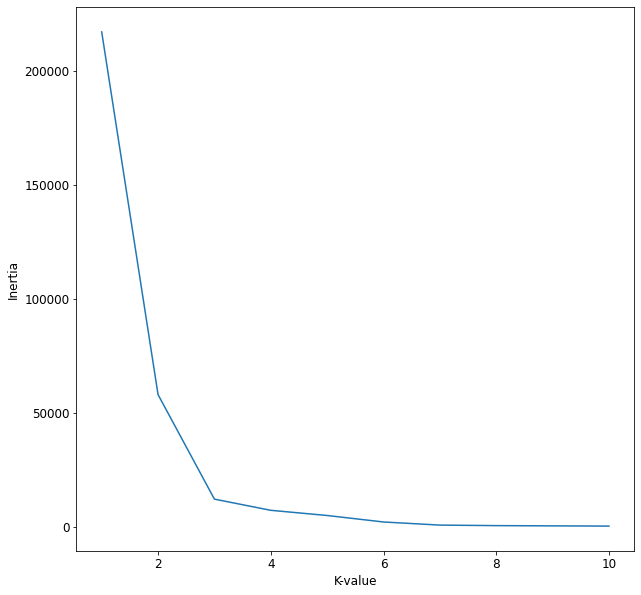

In [12]:
inertias = [] # intialize the inertias list
for i in range(1,11): # for different k values from 1 to 10
    km = KMeans(n_clusters=i) # we set the n_cluster variable to for loop variable i
    km.find_cluster(transform_2d) # we then find_clusters for data
    inertias.append(km.inertia) # then we append inverse of inertia to the inertias list
plt.plot(range(1,11), inertias) # plot k-values vs. inertias(inverse_inertias) list
plt.xlabel("K-value")
plt.ylabel("Inertia")
plt.show()

In [13]:
km = KMeans(n_clusters=3, initial='kmeans++') # creating an object of KMeans class
km.find_cluster(transform_2d) # calling find_cluster method and passing our 2D data

In [14]:
 #printing out the centroids
km.centroids

{0: array([-37.99905445,  -3.3430596 ]),
 1: array([ 41.07898199, -27.77102092]),
 2: array([-6.23984923, 33.2503129 ])}

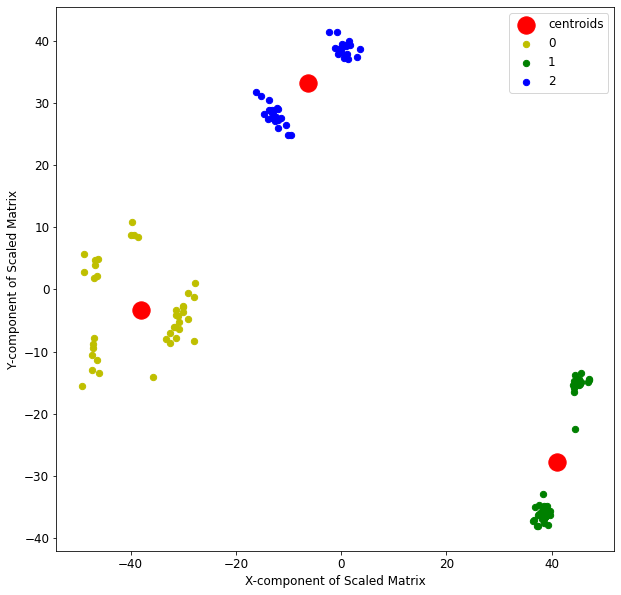

In [15]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=12)
colors = ["y", "g", "b", "violet", "orange"] # assign colors to our clusters since k is 3 for our case we are assigning 3 colors
# for centroid in KMeans.centroids
centroid_plot = plt.scatter(np.array(list(km.centroids.values()))[:,0], np.array(list(km.centroids.values()))[:,1], s = 300, marker = "o", color="red", label='centroids') # we scatter plot the centroids with a size of 300 and star marker with yellow color
for cluster in km.clusters: # every cluster in KMeans.clusters
    color = colors[cluster] # we choose a color from the colors list 
    
    plt.scatter(np.array(km.clusters[cluster])[:,0], np.array(km.clusters[cluster])[:,1], color = color,s = 40, label=cluster) # we plot the point with a marker size of 40 and color from the color list 
plt.legend(loc='upper right',prop={"size":12})
plt.xlabel("X-component of Scaled Matrix")
plt.ylabel("Y-component of Scaled Matrix")
plt.show() # show the graph